**`K-Means Clustering Algorithm`**: Given a set of points S, in an n-dimensional space, this algorithm iteratively partitions these points into `K` separate cluster. Initially, `K` different centroids are randomly selected designating `K` clusters, then each point is assigned to the cluster with the closest centroid (based on specified distance metric), then the cluster centroids are re-computed (the centroid is assigned the mean of all the points within the cluster). Then all points are re-assigned based on the new cluster centroids and the centroids are recomputed. This process repeats until the centroids converge leading to optimal clustering.   

In [2]:
import numpy as np

def k_means(S, k):

    print(f"Total number of points: {S.shape[0]} ")

    # pick k points randomly from S and assign as the centroids
    cn = np.zeros(shape=(k,S.shape[1]))
    for i in range(S.shape[1]):
        cn[:,i] = np.random.choice(S[:,i], size=k)
        
    print(f"Initial Centroids: {cn}")

    # partition S into k clusters, points assigned to cluster with nearest centroid
    
    # create a cluster array, which is a 1d array that holds the cluster label corresponding to each point in S
    C = np.zeros(shape=(S.shape[0]))

    d = np.zeros(shape=(k))
    mn = np.zeros(shape=(k))
    mn_old = np.zeros(shape=(k))
    converged = False
    first = True
    niters = 0

    while(not converged):

        # assign points to clusters
        for i in range(S.shape[0]):
            # compute distances to each centroid
            for j in range(k):
                d[j] = dist_l2(S[i], cn[j])
            # determine nearest centroid     
            C[i] = np.argmin(d)
  
        # update the centroids
        mn_old[:] = mn[:]
        cn[:,:] = 0.0
        mn[:] = 0
        for i in range(S.shape[0]):
            # accumulate centroid mean
            cn[int(C[i]),:] += S[i]
            # count number of items in each cluster
            mn[int(C[i])] += 1 

        for i in range(k):
            cn[i] = cn[i]/mn[i]    

        # compute sum of squared errors
        SSE = 0.0
        for i in range(S.shape[0]):
            SSE += dist_l2(S[i],cn[int(C[i]),:]) 

        print(f"SSE: {SSE}")

        # check if converged (criterion: less than 1% change in cluster sizes after the iteration)
        if(not first):
            converged = True
            for i in range(k):
                converged  = converged and (abs(1-mn[i]/mn_old[i]) < 0.01)

        first = False
        niters += 1
        print(f"Cluster sizes: {mn}, Updated Centroids: {cn}")
        if(converged):
            print(f"Custers have converged after {niters} iterations!")     

    return C, cn

# square of euclidean distance
def dist_l2(p1, p2):

    d = 0.0
    for i in range(p1.shape[0]):
        d += (p1[i] - p2[i])**2

    return d
    

Total number of points: 300 
Initial Centroids: [[-2.31420342 -2.02559422]
 [-2.54179393  1.24879916]
 [-1.09365775 -1.74246319]]
SSE: 1719.6367564031614
Cluster sizes: [  8. 120. 172.], Updated Centroids: [[-1.80823801 -2.32347592]
 [-1.20067955  2.95527969]
 [ 0.98792375 -0.65328582]]
SSE: 500.5602098272571
Cluster sizes: [ 93. 103. 104.], Updated Centroids: [[-1.05573416 -2.04639443]
 [-1.81299548  3.097468  ]
 [ 2.84901199  0.91303916]]
SSE: 340.25267702729855
Cluster sizes: [100. 100. 100.], Updated Centroids: [[-0.99508905 -2.01018123]
 [-1.95173944  3.0941924 ]
 [ 3.06058285  1.15279478]]
SSE: 340.25267702729855
Cluster sizes: [100. 100. 100.], Updated Centroids: [[-0.99508905 -2.01018123]
 [-1.95173944  3.0941924 ]
 [ 3.06058285  1.15279478]]
Custers have converged after 4 iterations!


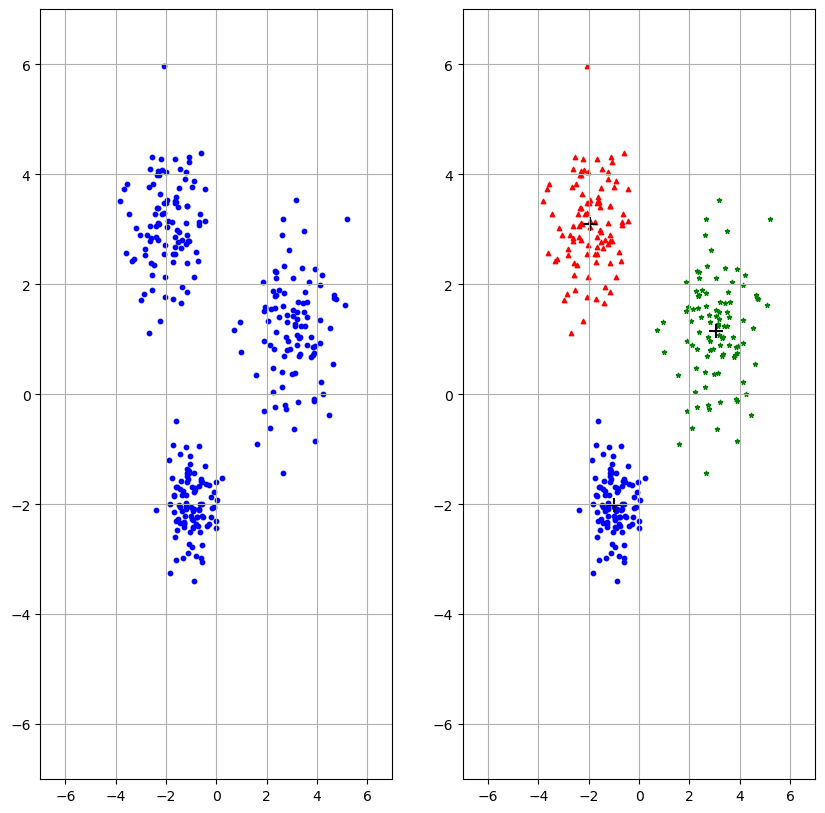

In [3]:
import matplotlib.pyplot as plt

np.random.seed(1)
Sx = np.random.normal(loc = 3.0, scale = 1.0, size = 100)
Sy = np.random.normal(loc = 1.0, scale = 1.0, size = 100)
Sx_1 = np.random.normal(loc = -1.0, scale = 0.5, size = 100)
Sy_1 = np.random.normal(loc = -2.0, scale = 0.5, size = 100)
Sx_2 = np.random.normal(loc = -2.0, scale = 0.75, size = 100)
Sy_2 = np.random.normal(loc = 3.0, scale = 0.75, size = 100)

S = np.array(list(zip(Sx, Sy)) + list(zip(Sx_1, Sy_1)) + list(zip(Sx_2, Sy_2))) 
Sxx = [p[0] for p in S]
Syy = [p[1] for p in S]

C, cn = k_means(S, 3)
S1_x = []
S1_y = []
S2_x = []
S2_y = []
S3_x = []
S3_y = []

for i in range(S.shape[0]):
    if(C[i] == 0):
        S1_x.append(S[i,0])
        S1_y.append(S[i,1])
    if(C[i] == 1):
        S2_x.append(S[i,0])
        S2_y.append(S[i,1])
    if(C[i] == 2):
        S3_x.append(S[i,0])
        S3_y.append(S[i,1])
    

plt.figure(figsize=(10,10))

plt.subplot(1, 2, 1)
plt.scatter(Sxx, Syy, s=10, c='b', marker='o')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(S1_x, S1_y, s=10, c='b', marker='o')
plt.scatter(S2_x, S2_y, s=10, c='r', marker='^')
plt.scatter(S3_x, S3_y, s=10, c='g', marker='*')
plt.scatter(cn[:,0], cn[:,1], s=100, c='k', marker='+')
plt.xlim([-7,7])
plt.ylim([-7,7])
plt.grid()

plt.show()
